In [1]:
import pandas as pd
import numpy as np

# read in the data
names = [("A" + str(x+1)) for x in range(0,16)] # generate list of column names
df = (pd.read_csv('../Datasets/crx.data', 
                 header=None,
                 names=names)
        .replace({'?': np.nan}))  # here we are automatically replace question marks with np.nan

## 2. Find and repleace null values
The easiest way to check each column for null values is to use the following statement:

In [2]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

We can use the following syntax to pull out rows that contain any null values:

In [3]:
df[df.isnull().any(axis=1)].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-


Examine the rows and remove the null values from each column in an appropriate way.

For example, let's look at the unique vaues in A4. There appears to be two categorical values and the number 1.

In [4]:
df.A4.unique()

array(['u', 'y', nan, 'l'], dtype=object)

The simplest way to replace null values in categorical data is to fillna() with the most frequent column value, so that you are not changing the columns frequency distribution:

In [5]:
df.A4.value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [6]:
df["A4"] = df.A4.fillna("u")

In [8]:
df.A1.mode()

0    b
dtype: object

In [9]:
df["A1"] = df.A1.fillna(df.A1.mode)

In [11]:
df.A2.mean()

TypeError: can only concatenate str (not "int") to str

In [12]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [13]:
df.A2 = df.A2.astype(float)

In [14]:
df.A2 = df.A2.fillna(df.A2.mean())

In [15]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 3. One-hot encode the A16 column
A16 contains the class labels, which are the target for the dataframe. These can be one-hot-encoded so that:

- "-" = 0
- "+" = 1

This would allow us to use this information in a regression, or other machine learning model.

In [16]:
df[["A15", "A16"]] = pd.get_dummies(df[['A15', 'A16']])

In [ ]:
df[["col2", "col2"]]

In [17]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [2]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


## 4. Standardize the Dataset
We can see that several of the columns are on different scales.

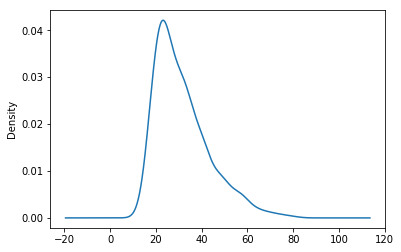

In [18]:
%matplotlib inline
df.A2.plot(kind='density')

In [19]:
# standardize each numeric using either Zscore or MinMax, according to the columns distribution

In [3]:
# pull out numeric columns
df_nums = df[["A2", "A3", "A8", "A14", "A15"]]

In [4]:
df_nums.dtypes

A2      object
A3     float64
A8     float64
A14     object
A15      int64
dtype: object

In [5]:
df_nums["A14"] = df_nums.A14.astype(float)

C:\Users\selasady\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Standard Scaling

In [6]:
from sklearn import preprocessing 

# Create a minimum and maximum processor object
standard_scaler = preprocessing.StandardScaler()

df_std = pd.DataFrame(standard_scaler.fit_transform(df_nums))

C:\Users\selasady\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\selasady\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
[str(x) + "_std" for x in df_nums.columns]

In [25]:
df_std.columns = [str(x) + "_std" for x in df_nums.columns]

In [26]:
df_std.head()

,A2_std,A3_std,A8_std,A14_std,A15_std
0,-0.062321,-0.956613,-0.291083,0.103555,-0.195413
1,2.288101,-0.060051,0.244190,-0.811931,-0.087852
2,-0.596738,-0.856102,-0.216324,0.552661,-0.037144
3,-0.315599,-0.647038,0.456505,-0.483738,-0.194837
4,-0.962303,0.174141,-0.153526,-0.368582,-0.195413


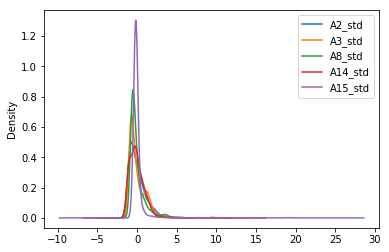

In [27]:
df_std.plot(kind='density')

## MinMax Scaling¶

In [28]:
# Create a minimum and maximum processor object
minmax_scaler = preprocessing.MinMaxScaler()

df_mm = pd.DataFrame(minmax_scaler.fit_transform(df_nums))

/Users/summerrae/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
df_mm.columns = [str(x) + "_mm" for x in df_nums.columns]

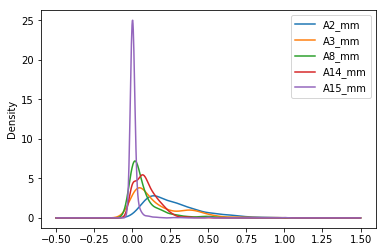

In [30]:
df_mm.plot(kind='density')